# Transport Data Science Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Introduction
### Transport Data Science Project (TDSP)
The Transport Data Science Project was a 4 week data science and research program centered on analyzing the New York City Department of Transportation's [Motor Vehicle Collision - Crashes Dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Vehicles/bm4k-52h4/about_data). During my cycle of the TDSP program there were a roughly a thousand participants, I was one of 20 to be selected to present my research to the NYC Department of Transportation in a virtual research symposium. 

### This Notebook
Below is my work doing exploratory data analysis to understand the data better. The first few lines of code were problem sets from the program however quickly after that I do my own more complicated analysis to identify potential feature variables for different machine learning models. I will also be importing extra datasets for deeper analysis and inference.

### ML Task: Predicting Injury vs Fatality for Collisions
In this project my main goal is to try to predict whether or not certain motor vehicle collision leads to at least one injury or at least one fatality. 

## Exploratory Data Analysis

### Loading Data

Let's first load the data then look at some metadata regarding the dimensions of the datasets. There's around 2.1 million rows in [Crashes dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Vehicles/bm4k-52h4/about_data), around 4.3 million in the [Vehicles dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Vehicles/bm4k-52h4/about_data) and around 5.7 million in the [Persons dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Person/f55k-p6yu/about_data) Both datasets also have a lot of missing values.

In [3]:
vehicle_path = os.path.abspath(os.path.join(os.path.dirname('intro.ipynb'), '..', 'data/raw/nyc-vehicle.csv')) 
crashes_path = os.path.abspath(os.path.join(os.path.dirname('intro.ipynb'), '..', 'data/raw/nyc-crashes.csv')) 
persons_path = os.path.abspath(os.path.join(os.path.dirname('intro.ipynb'), '..', 'data/raw/nyc-people.csv')) 

rVehicle = pd.read_csv(vehicle_path)
rCrashes = pd.read_csv(crashes_path)
rPersons = pd.read_csv(persons_path)

/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_32105/238246667.py:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  rVehicle = pd.read_csv(vehicle_path)
/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_32105/238246667.py:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  rCrashes = pd.read_csv(crashes_path)


In [4]:
rVehicle.head(5)

,unique_id,collision_id,crash_date,crash_time,vehicle_id,state_registration,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,...,pre_crash,point_of_impact,vehicle_damage,public_property_damage,contributing_factor_2,vehicle_damage_1,vehicle_damage_2,vehicle_damage_3,vehicle_model,public_property_damage_type
0,10385780,100201,2012-09-07T00:00:00.000,9:03,1,NY,PASSENGER VEHICLE,Unspecified,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19140702,4213082,2019-09-23T00:00:00.000,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N,Unspecified,NaN,NaN,NaN,NaN,NaN
2,14887647,3307608,2015-10-02T00:00:00.000,17:18,2,NY,TAXI,Driver Inattention/Distraction,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14889754,3308693,2015-10-04T00:00:00.000,20:34,1,NY,PASSENGER VEHICLE,Unspecified,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14400270,297666,2013-04-25T00:00:00.000,21:15,1,NY,PASSENGER VEHICLE,Other Vehicular,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rCrashes.head(5)

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-01T00:00:00.000,1:29,OCEAN PARKWAY,AVENUE K,1.0,0.0,0,0,0,0,...,40.62179,-73.970024,"{'latitude': '40.62179', 'longitude': '-73.970...",Unspecified,Sedan,NaN,NaN,NaN,NaN,NaN
3,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-21T00:00:00.000,13:21,BROOKLYN BRIDGE,NaN,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rPersons.head(5)

,unique_id,collision_id,crash_date,crash_time,person_id,person_type,person_injury,vehicle_id,ped_role,person_sex,...,ejection,emotional_status,bodily_injury,position_in_vehicle,safety_equipment,complaint,ped_location,ped_action,contributing_factor_1,contributing_factor_2
0,10249006,4229554,2019-10-26T00:00:00.000,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,Registrant,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10255054,4230587,2019-10-25T00:00:00.000,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,Passenger,F,...,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,Does Not Apply,NaN,NaN,NaN,NaN
2,10253177,4230550,2019-10-26T00:00:00.000,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,Registrant,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6650180,3565527,2016-11-21T00:00:00.000,13:05,2782525,Occupant,Unspecified,NaN,Notified Person,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10255516,4231168,2019-10-25T00:00:00.000,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,Passenger,F,...,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,Does Not Apply,NaN,NaN,NaN,NaN


In [7]:
print("Num rows in rVehicle: ", len(rVehicle))
print("rVehicle Columns: ", rVehicle.columns)
print("Num rows in rCrashes: ", len(rCrashes))
print("rCrashes Columns: ", rCrashes.columns)
print("Num rows in rPersons: ", len(rPersons))
print("rPersons Columns: ", rPersons.columns)

Num rows in rVehicle:  4389391
rVehicle Columns:  Index(['unique_id', 'collision_id', 'crash_date', 'crash_time', 'vehicle_id',
       'state_registration', 'vehicle_type', 'contributing_factor_1',
       'vehicle_make', 'vehicle_year', 'travel_direction', 'vehicle_occupants',
       'driver_sex', 'driver_license_status', 'driver_license_jurisdiction',
       'pre_crash', 'point_of_impact', 'vehicle_damage',
       'public_property_damage', 'contributing_factor_2', 'vehicle_damage_1',
       'vehicle_damage_2', 'vehicle_damage_3', 'vehicle_model',
       'public_property_damage_type'],
      dtype='object')
Num rows in rCrashes:  2187413
rCrashes Columns:  Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed

In [9]:
def count_na(data):
    missing_values = data.isnull().sum()

    missing_values_percentage = (missing_values / len(data)) * 100

    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
    return missing_data.sort_values(by='Percentage (%)', ascending=False)

In [49]:
count_na(rVehicle)

,Missing Values,Percentage (%)
public_property_damage_type,4360272,99.336605
vehicle_model,4338012,98.829473
vehicle_damage_3,3382594,77.062946
vehicle_damage_2,3087534,70.340829
vehicle_damage_1,2674919,60.940550
driver_license_status,2391442,54.482319
driver_license_jurisdiction,2387714,54.397387
driver_sex,2292081,52.218656
vehicle_year,1945588,44.324782
vehicle_make,1922423,43.797032


In [50]:
count_na(rCrashes)

,Missing Values,Percentage (%)
vehicle_type_code_5,2177860,99.563274
contributing_factor_vehicle_5,2177554,99.549285
vehicle_type_code_4,2152681,98.412188
contributing_factor_vehicle_4,2151382,98.352803
vehicle_type_code_3,2035421,93.051518
contributing_factor_vehicle_3,2029336,92.773335
cross_street_name,1806314,82.577639
off_street_name,835087,38.176924
zip_code,674046,30.814757
borough,673773,30.802276


In [10]:
count_na(rPersons)

,Missing Values,Percentage (%)
contributing_factor_2,5610219,98.296282
contributing_factor_1,5610098,98.294162
ped_action,5608829,98.271928
ped_location,5608728,98.270158
safety_equipment,2969575,52.029730
ejection,2775174,48.623643
position_in_vehicle,2774743,48.616091
emotional_status,2681637,46.984787
bodily_injury,2681594,46.984034
complaint,2681587,46.983911


### Initial Analysis

Now let's look more closely at some basic summary statistics and distributions. We're looking at means, counts, modes etc for this round of initial analysis.

In [13]:
def reporting(col, name, dropna=False, continuous=True, topten=True, exclude_outliers=False):
    col = pd.Series(col)
    if dropna:
        col = col.dropna()

    if continuous:
        data = col.copy()

        if exclude_outliers:
            # Use IQR method to exclude outliers
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            data = data[(data >= lower) & (data <= upper)]
            print(f"{name}: {len(col) - len(data)} outliers excluded")

        mean = data.mean()
        count = data.count()
        max_val = data.max()
        min_val = data.min()
        print(f"{name} mean: {mean:.2f} | count: {count}")
        print(f"{name} max: {max_val} | min: {min_val}")

        plt.hist(data, density=True, bins=30, edgecolor='black')
        plt.title(f"Distribution of {name}")
        plt.xlabel(name)
        plt.ylabel("Probability Density")
        plt.show()

    else:
        counts = col.value_counts(dropna=dropna)
        vals = counts.index.to_list()
        if topten:
            counts = counts[:10]
            vals = vals[:10]
        counts_list = counts.to_list()
        most_common = vals[np.argmax(counts_list)]
        least_common = vals[np.argmin(counts_list)]
        print(f"{name} most common: {most_common}, count: {np.max(counts_list)}")
        print(f"{name} least common: {least_common}, count: {np.min(counts_list)}")

        plt.bar([str(v) for v in vals], counts_list)
        plt.title(f"Top Categories in {name}")
        plt.xlabel("Values")
        plt.ylabel("Counts")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [11]:
rVehCols = ['vehicle_type', 
        'contributing_factor_1',
        'vehicle_make', 
        'vehicle_year', 
        'travel_direction', 
        'vehicle_occupants',
        'driver_sex', 
        'driver_license_status', 
        'driver_license_jurisdiction',
        'pre_crash', 
        'point_of_impact', 
        'vehicle_damage',
       'public_property_damage', 
       'contributing_factor_2', 
       'vehicle_damage_1',
       'vehicle_damage_2', 
       'vehicle_damage_3', 
       'vehicle_model',
       'public_property_damage_type'
        ]
rCrashColsNum = ['number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed']
rCrashColsCat = ['contributing_factor_vehicle_1', 'borough', 'vehicle_type_code1']
rPersonsCols = ['person_type', 'person_injury', 'ped_role', 'person_sex',
       'person_age', 'ejection', 'emotional_status', 'bodily_injury',
       'position_in_vehicle', 'safety_equipment'] 

vehicle_type most common: Sedan, count: 1126180
vehicle_type least common: TAXI, count: 60790


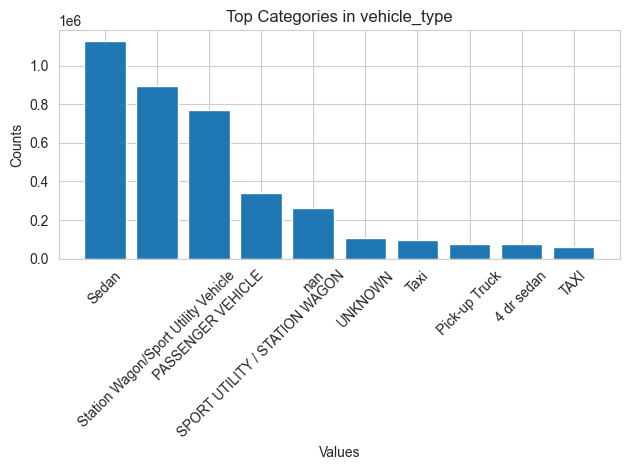

contributing_factor_1 most common: Unspecified, count: 2474553
contributing_factor_1 least common: Turning Improperly, count: 63547


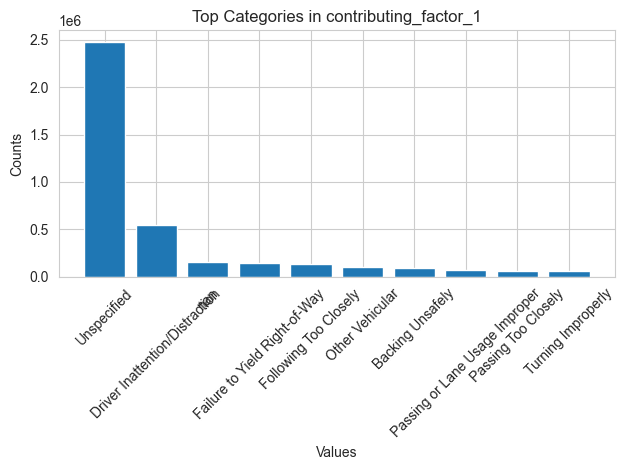

vehicle_make most common: nan, count: 1922423
vehicle_make least common: JEEP -CAR/SUV, count: 81077


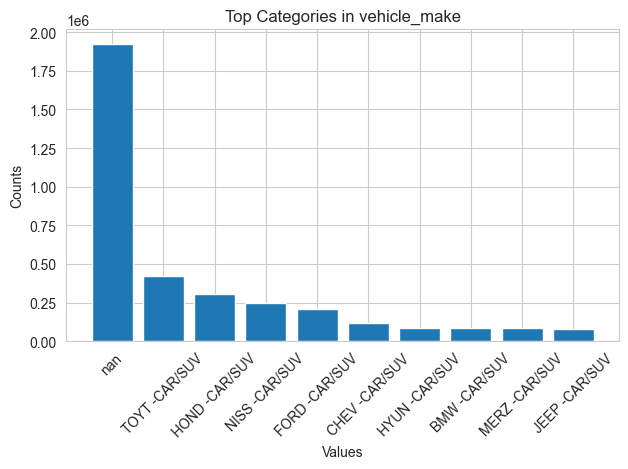

Errored on name vehicle_year, passing error message: 10
travel_direction most common: nan, count: 1682035
travel_direction least common: Northwest, count: 33079


/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/3988986986.py:36: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  counts = counts[:10]


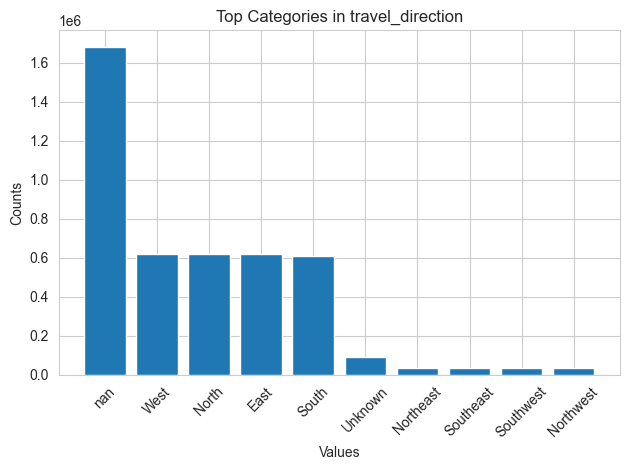

/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/3988986986.py:36: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  counts = counts[:10]


Errored on name vehicle_occupants, passing error message: list index out of range
driver_sex most common: nan, count: 2292081
driver_sex least common: U, count: 8829


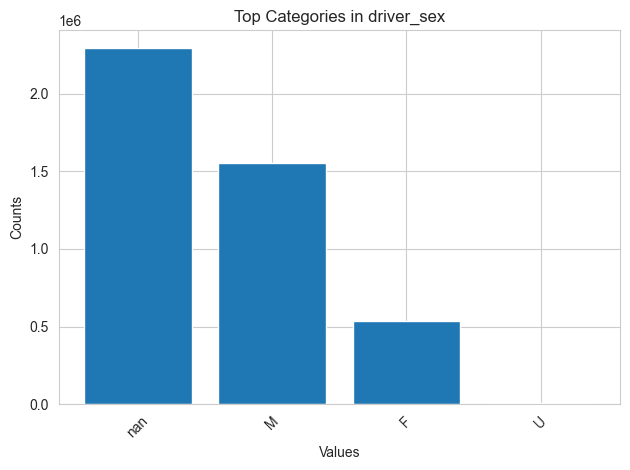

driver_license_status most common: nan, count: 2391442
driver_license_status least common: Permit, count: 19154


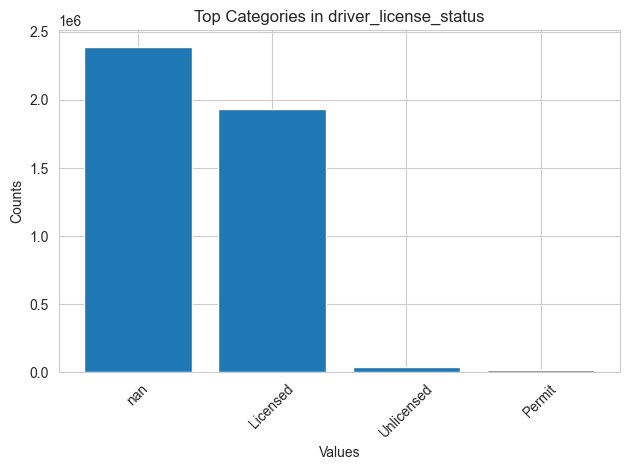

driver_license_jurisdiction most common: nan, count: 2387714
driver_license_jurisdiction least common: GA, count: 6669


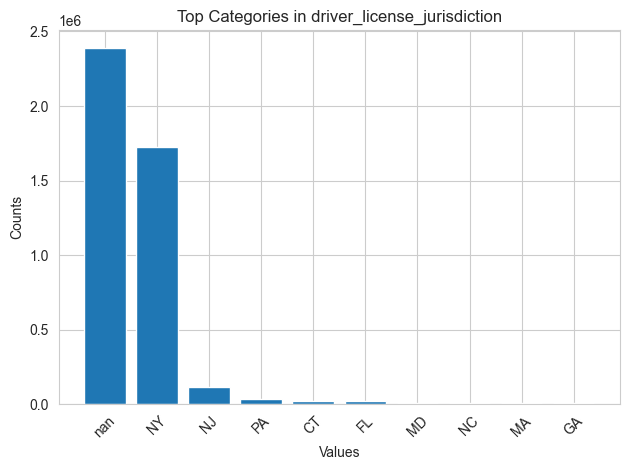

pre_crash most common: Going Straight Ahead, count: 1694711
pre_crash least common: Merging, count: 55567


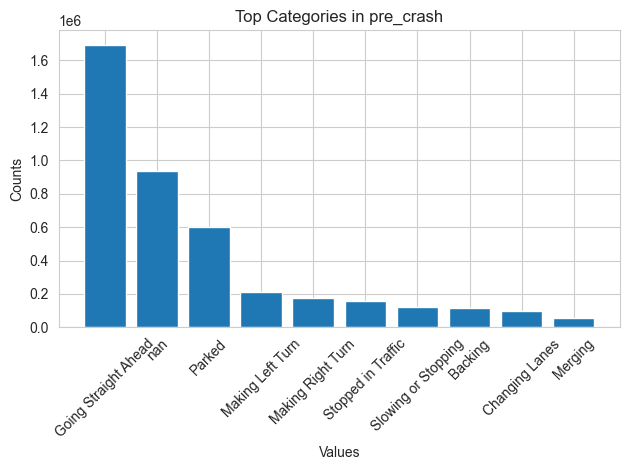

point_of_impact most common: nan, count: 1716526
point_of_impact least common: Left Rear Bumper, count: 140072


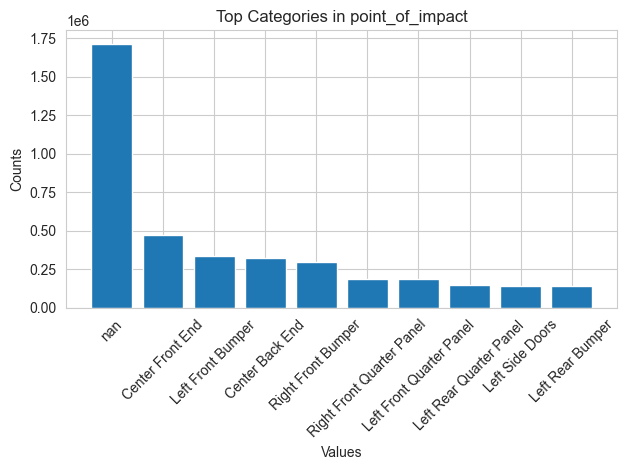

vehicle_damage most common: nan, count: 1743656
vehicle_damage least common: Left Rear Quarter Panel, count: 145280


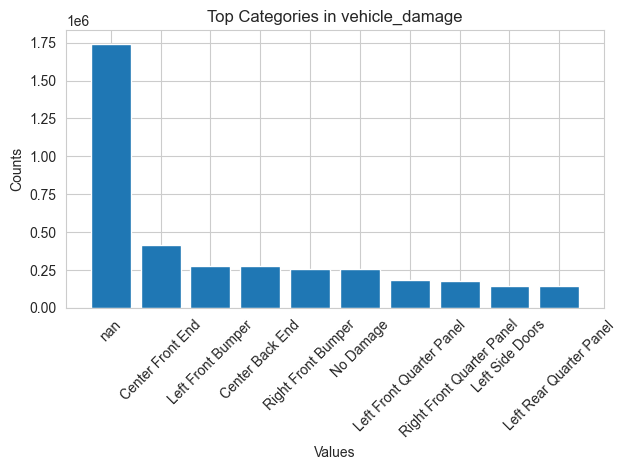

public_property_damage most common: N, count: 2492469
public_property_damage least common: Y, count: 16909


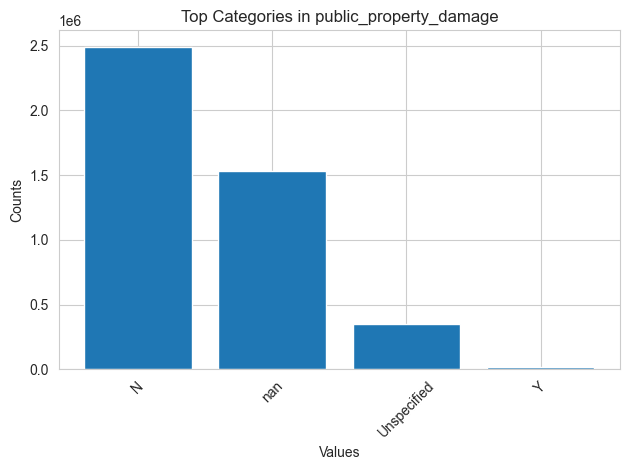

contributing_factor_2 most common: Unspecified, count: 2096593
contributing_factor_2 least common: Other Vehicular, count: 29758


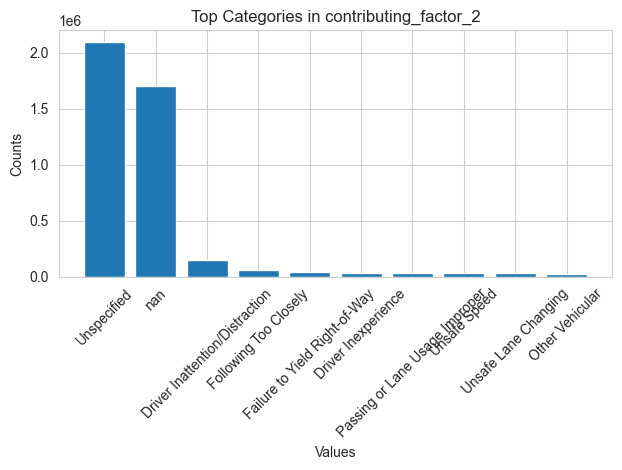

vehicle_damage_1 most common: nan, count: 2674919
vehicle_damage_1 least common: Left Rear Quarter Panel, count: 76964


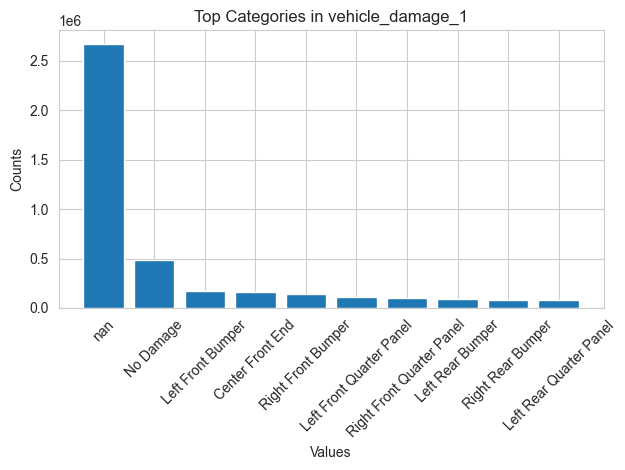

vehicle_damage_2 most common: nan, count: 3087534
vehicle_damage_2 least common: Left Rear Quarter Panel, count: 40894


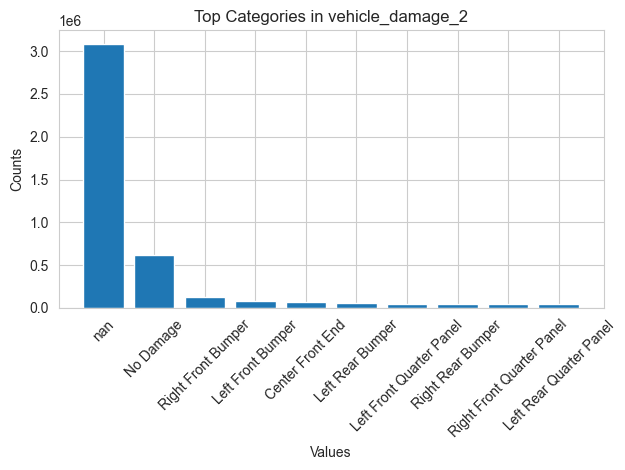

vehicle_damage_3 most common: nan, count: 3382594
vehicle_damage_3 least common: Left Rear Quarter Panel, count: 17203


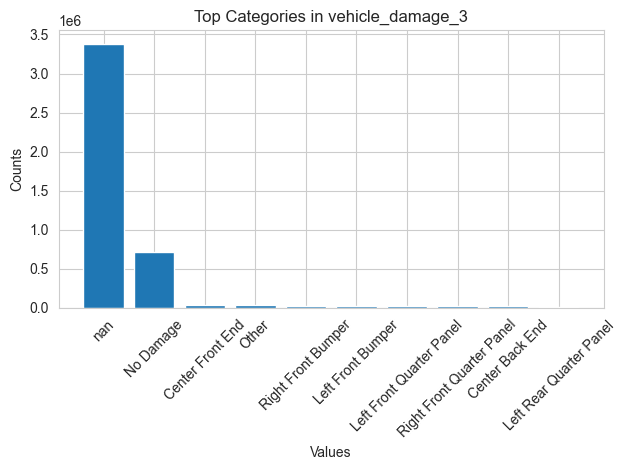

vehicle_model most common: nan, count: 4338012
vehicle_model least common: HOND ZZZ, count: 852


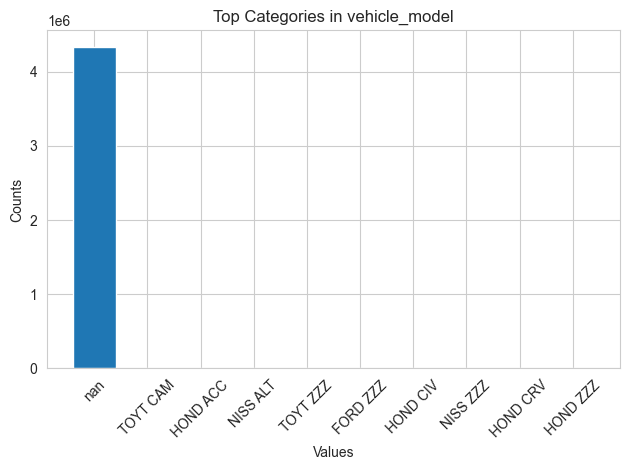

public_property_damage_type most common: nan, count: 4360272
public_property_damage_type least common: STOP SIGN, count: 104


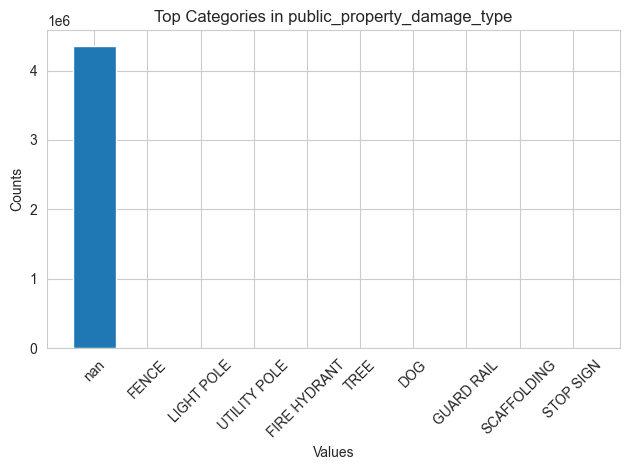

In [53]:
for name in rVehCols:
    try: reporting(col=rVehicle[name], name=name, continuous=False)
    except Exception as e:
        print(f"Errored on name {name}, passing error message: {e}")
        continue

contributing_factor_vehicle_1 most common: Unspecified, count: 734518
contributing_factor_vehicle_1 least common: Fatigued/Drowsy, count: 47499


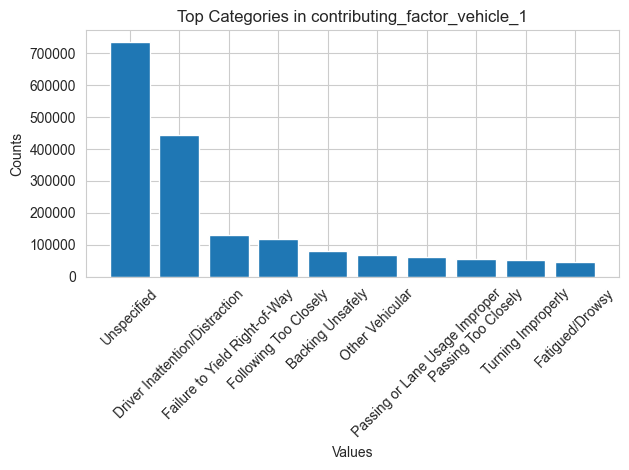

borough most common: nan, count: 673773
borough least common: STATEN ISLAND, count: 63442


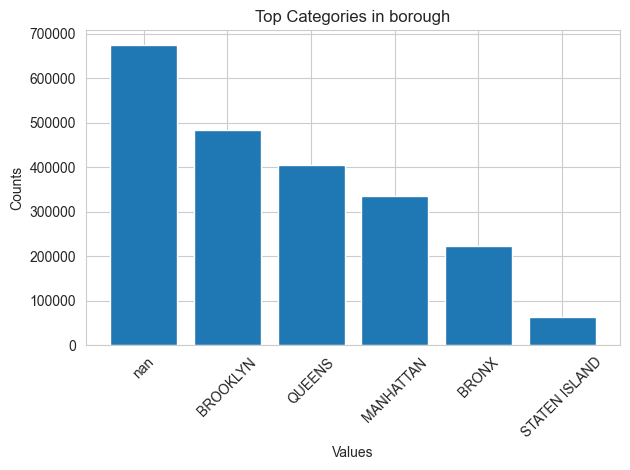

vehicle_type_code1 most common: Sedan, count: 627066
vehicle_type_code1 least common: VAN, count: 25242


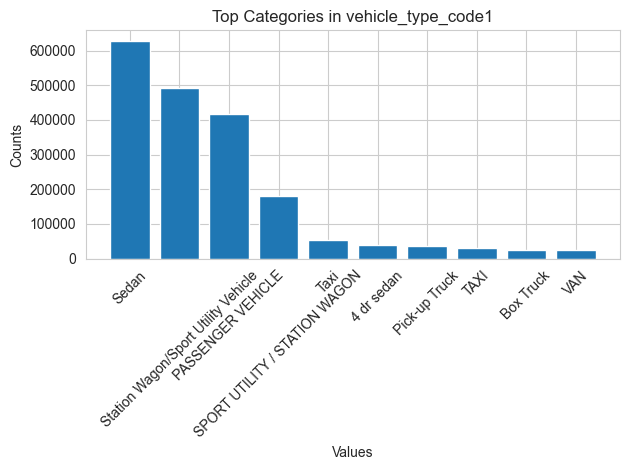

In [54]:
for name in rCrashColsCat:
    try: reporting(col=rCrashes[name], name=name, continuous=False)
    except Exception as e:
        print(f"Errored on name {name}, passing error message: {e}")
        continue

number_of_persons_injured mean: 0.32 | count: 2187395
number_of_persons_injured max: 43.0 | min: 0.0


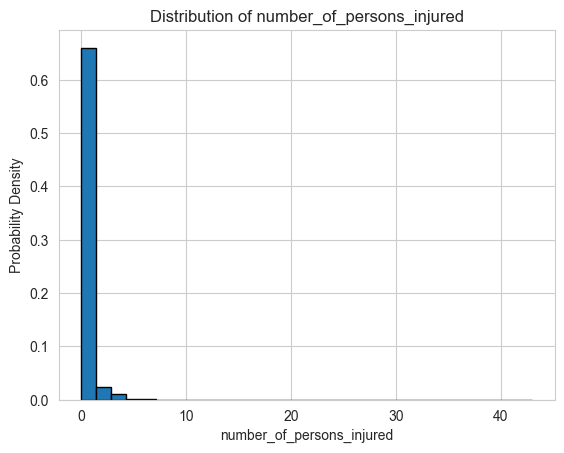

number_of_persons_killed mean: 0.00 | count: 2187382
number_of_persons_killed max: 8.0 | min: 0.0


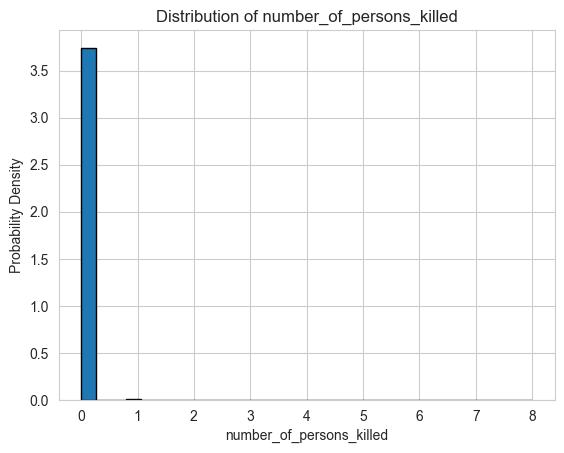

number_of_pedestrians_injured mean: 0.06 | count: 2187413
number_of_pedestrians_injured max: 27 | min: 0


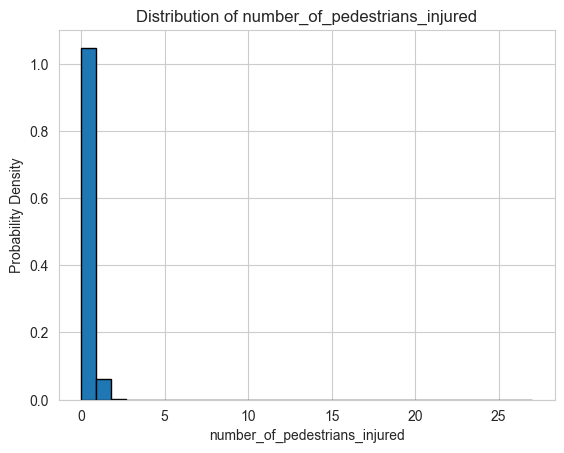

number_of_pedestrians_killed mean: 0.00 | count: 2187413
number_of_pedestrians_killed max: 6 | min: 0


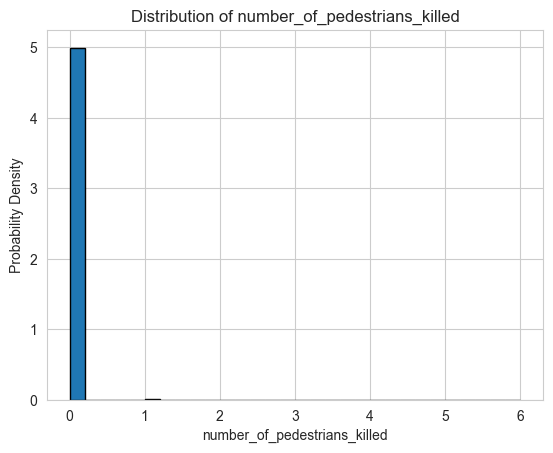

number_of_cyclist_injured mean: 0.03 | count: 2187413
number_of_cyclist_injured max: 4 | min: 0


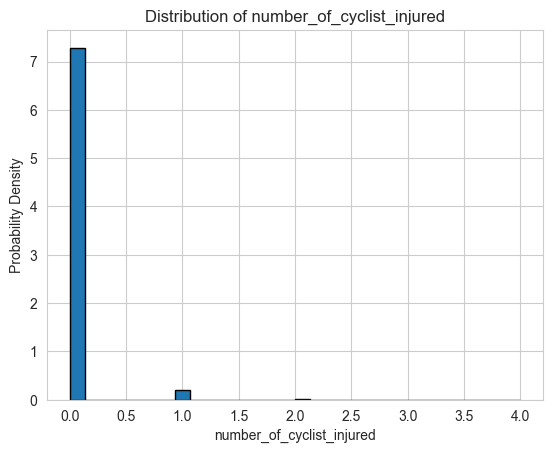

number_of_cyclist_killed mean: 0.00 | count: 2187413
number_of_cyclist_killed max: 2 | min: 0


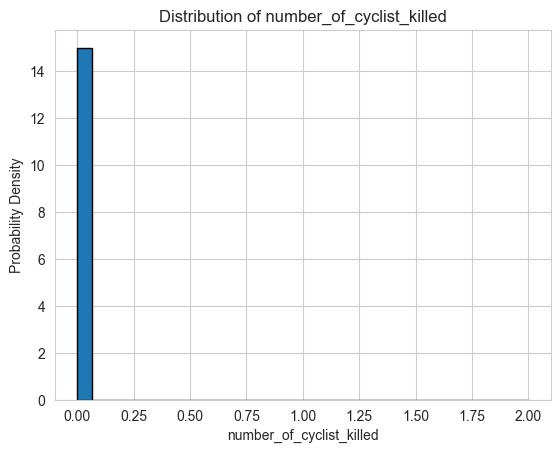

number_of_motorist_injured mean: 0.23 | count: 2187413
number_of_motorist_injured max: 43 | min: 0


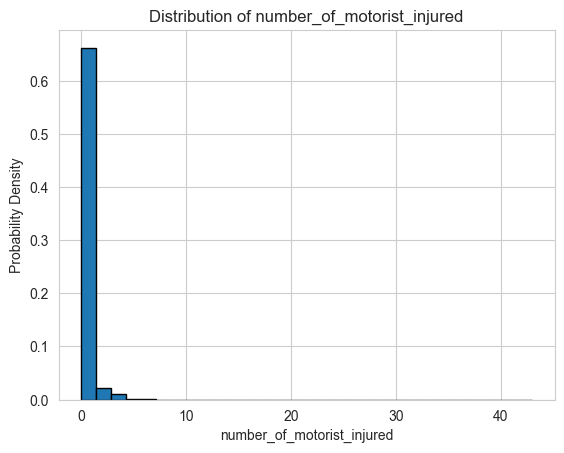

number_of_motorist_killed mean: 0.00 | count: 2187413
number_of_motorist_killed max: 5 | min: 0


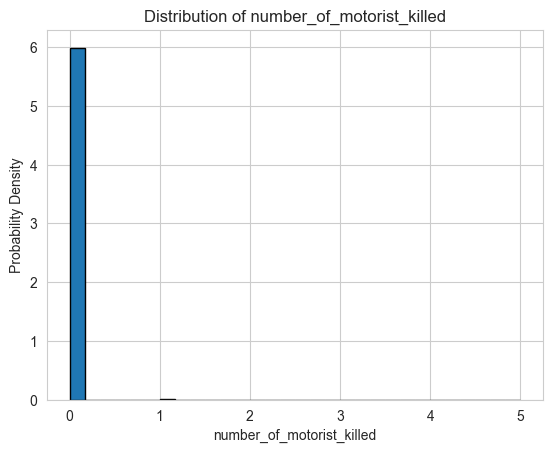

In [55]:
for name in rCrashColsNum:
    try: reporting(col=rCrashes[name], name=name, continuous=True, exclude_outliers=False)
    except Exception as e:
        print(f"Errored on name {name}, passing error message: {e}")
        continue

person_type most common: Occupant, count: 5482365
person_type least common: Other Motorized, count: 11480


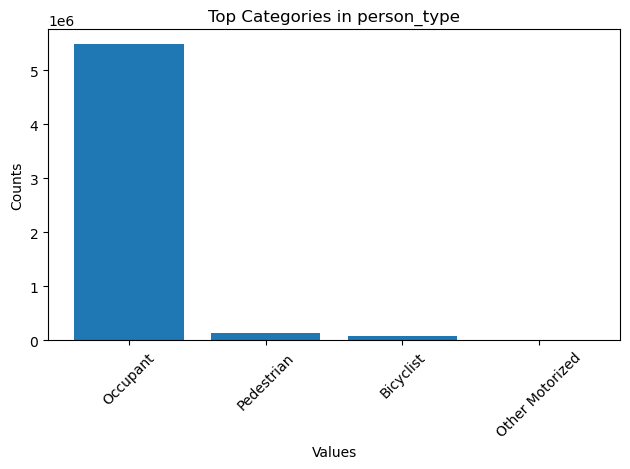

person_injury most common: Unspecified, count: 4995821
person_injury least common: Killed, count: 3399


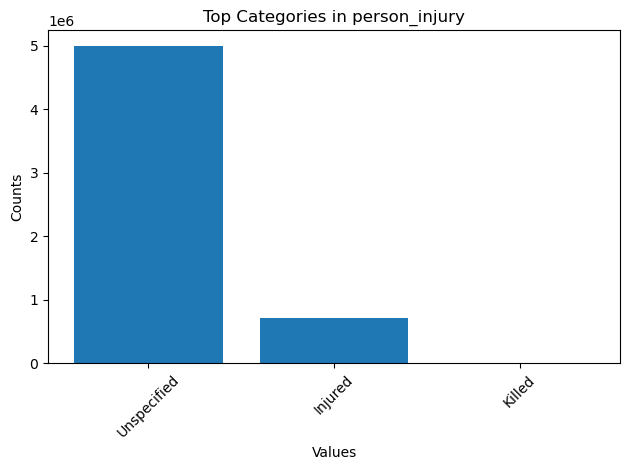

ped_role most common: Registrant, count: 2367374
ped_role least common: Other, count: 1864


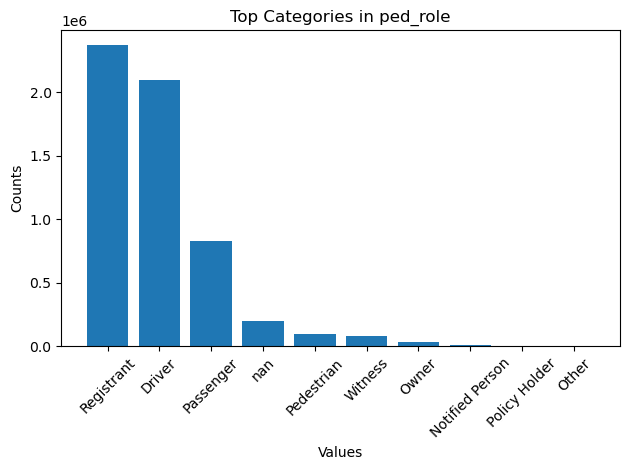

person_sex most common: M, count: 3087892
person_sex least common: U, count: 440426


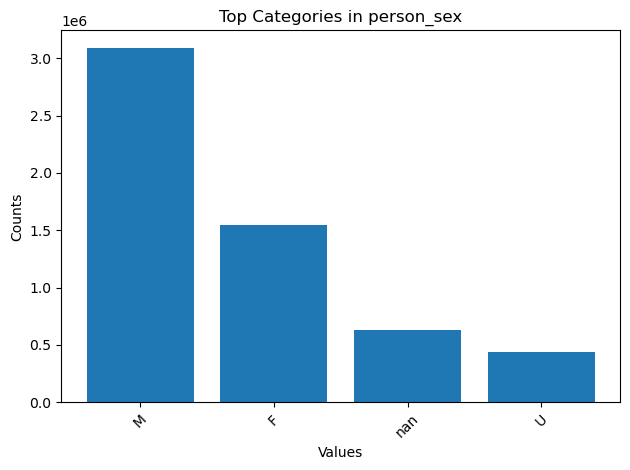

Errored on name person_age, passing error message: list index out of range
ejection most common: Not Ejected, count: 2873657
ejection least common: Unknown, count: 541


/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_32105/3988986986.py:36: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  counts = counts[:10]


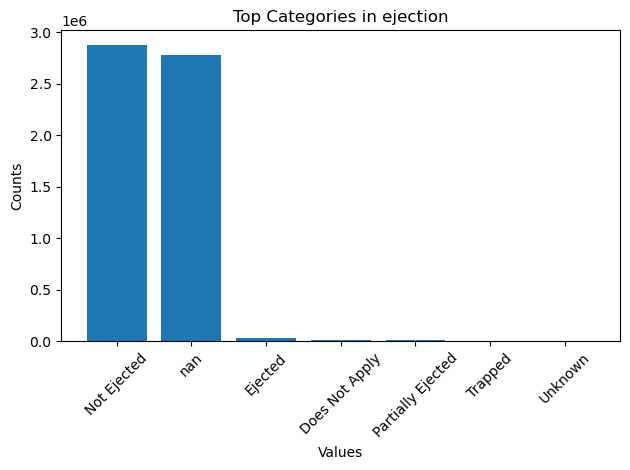

emotional_status most common: nan, count: 2681637
emotional_status least common: Incoherent, count: 1975


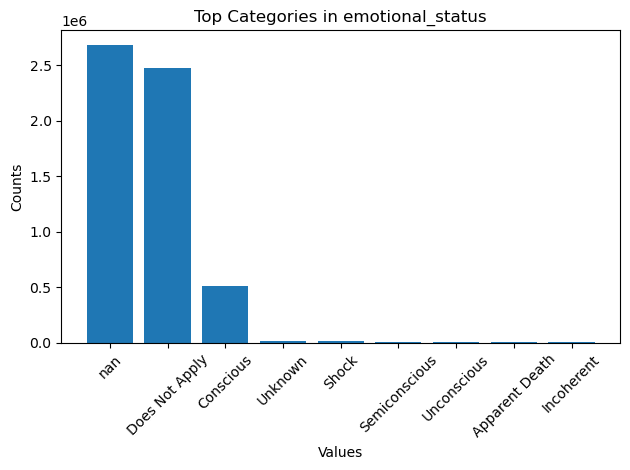

bodily_injury most common: nan, count: 2681594
bodily_injury least common: Unknown, count: 22426


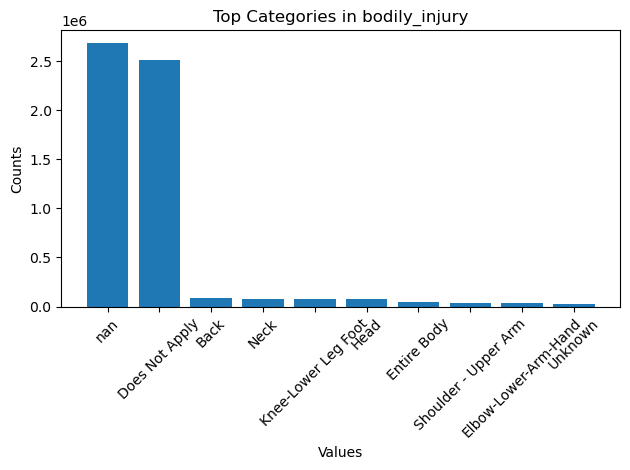

position_in_vehicle most common: nan, count: 2774743
position_in_vehicle least common: Riding/Hanging on Outside, count: 7903


/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_32105/3988986986.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


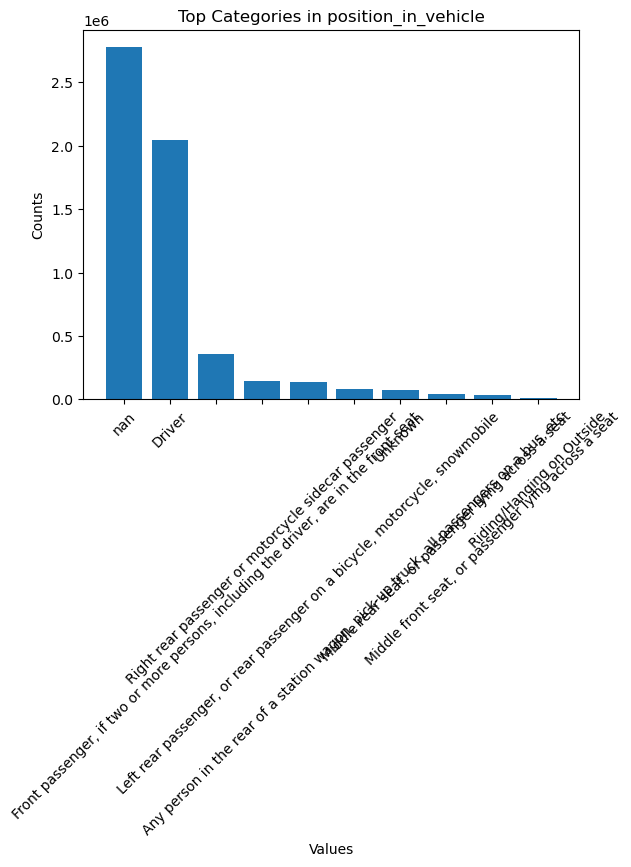

safety_equipment most common: nan, count: 2969575
safety_equipment least common: Helmet Only (In-Line Skater/Bicyclist), count: 11392


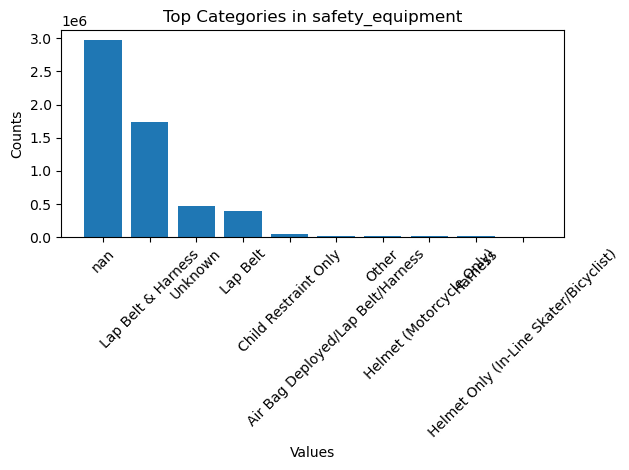

In [14]:
for name in rPersonsCols:
    try: reporting(col=rPersons[name], name=name, continuous=False)
    except Exception as e:
        print(f"Errored on name {name}, passing error message: {e}")
        continue

/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/2600181322.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")


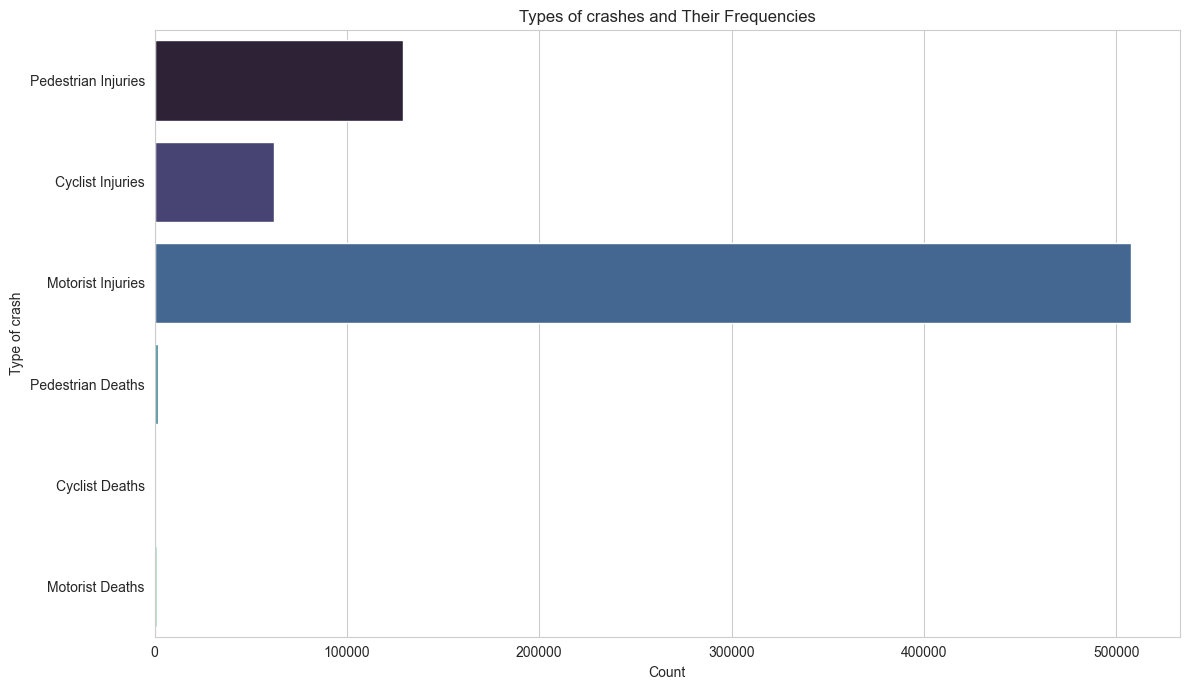

In [56]:
def type_crashes():
    types_of_crashes = {
        'Pedestrian Injuries': rCrashes['number_of_pedestrians_injured'].sum(),
        'Cyclist Injuries': rCrashes['number_of_cyclist_injured'].sum(),
        'Motorist Injuries': rCrashes['number_of_motorist_injured'].sum(),
        'Pedestrian Deaths': rCrashes['number_of_pedestrians_killed'].sum(),
        'Cyclist Deaths': rCrashes['number_of_cyclist_killed'].sum(),
        'Motorist Deaths': rCrashes['number_of_motorist_killed'].sum()
    }

    # Converting to DataFrame for easier plotting - we want the items in the dictionary, use the items function
    crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

    # Plot
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")
    plt.title('Types of crashes and Their Frequencies')
    plt.xlabel('Count')
    plt.ylabel('Type of crash')
    plt.tight_layout()
    plt.show()

type_crashes()

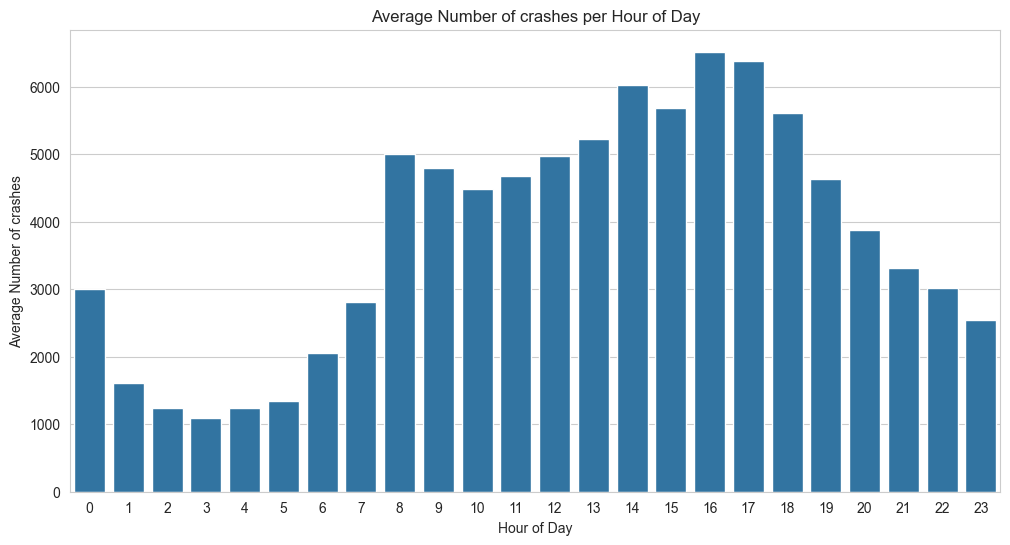

In [57]:
def crash_date(data):
    # Convert 'CRASH DATE' and 'CRASH TIME' to datetime
    data['crash_date'] = pd.to_datetime(data['crash_date'])
    data['crash_time'] = pd.to_datetime(data['crash_time'], format='%H:%M')

    # Time of Day Analysis
    data['Hour of Day'] = data['crash_time'].dt.hour

    # Group by 'Hour of Day' and calculate the average number of crashes per hour
    average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

    # Plot the average number of crashes
    plt.figure(figsize=(12, 6))
    sns.barplot(x=pd.Series(average_crashes_per_hour.index), y=average_crashes_per_hour.values)
    plt.title('Average Number of crashes per Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Number of crashes')
    plt.xticks(range(0, 24))
    plt.show()

crash_date(rCrashes)

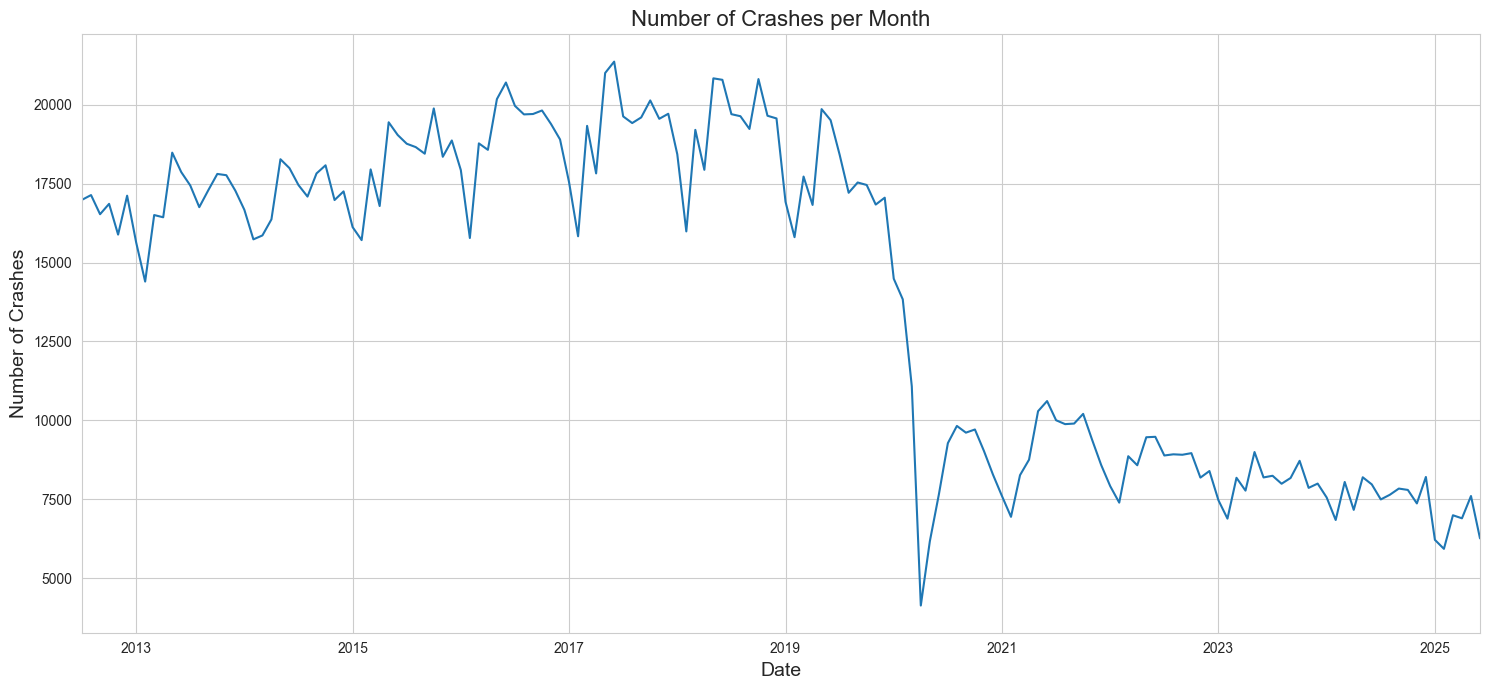

In [58]:
def crashes_monthly(data):
    data['crash_date'] = pd.to_datetime(data['crash_date'])

    # Group by month and year to get the number of crashes per month
    monthly_crashes = data.groupby(data['crash_date'].dt.to_period("M")).size()

    # Plotting the trend over time
    plt.figure(figsize=(15, 7))
    monthly_crashes.plot()
    plt.title('Number of Crashes per Month', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Crashes', fontsize=14)
    plt.tight_layout()
    plt.show()

crashes_monthly(rCrashes)

/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/2251429797.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


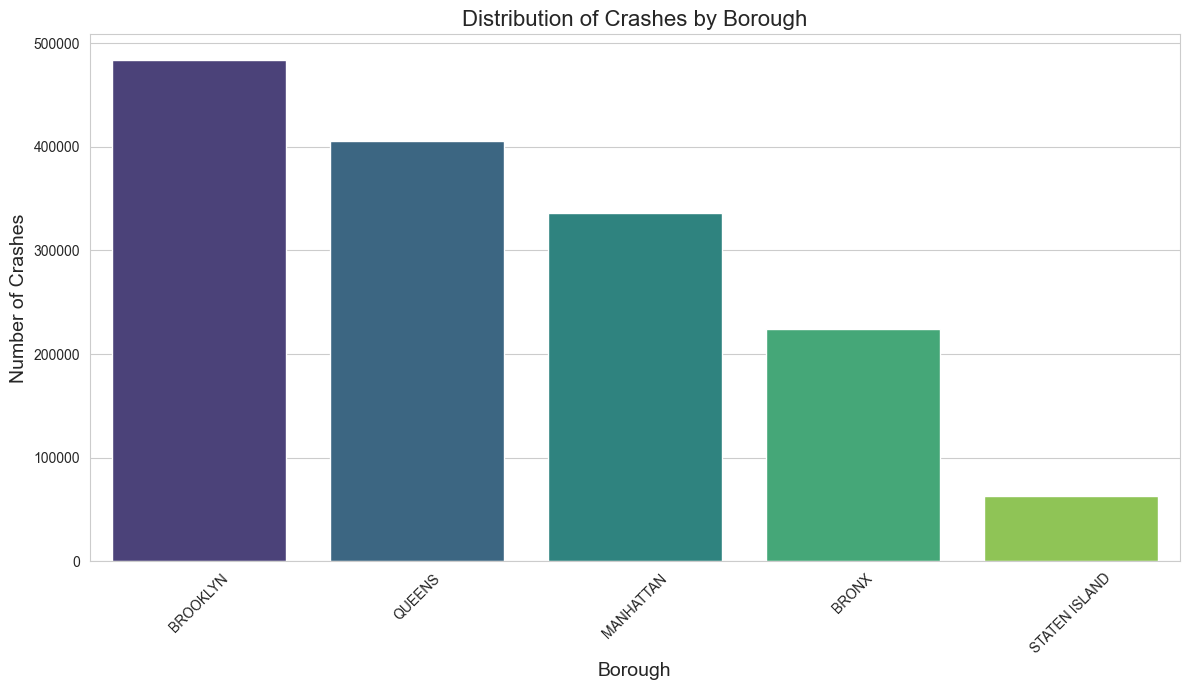

In [59]:
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS. Hint: Use value_count function.
borough_count = rCrashes['borough'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pre-Feature Engineering Analysis

Now let's filter the data to include only observations where there are injuries and fatalities and re-examine the data. We will focuses more on the Crashes dataset as that's where our response variable is.

#### Analyzing Response Variable 

First let's look at the statistics on injuries and deaths. Given the extremely small amount of injuries or deaths, our final response variable will be the number of crashes that have at least one injury OR death.

In [61]:
def consolidate_response(data):
    data = data.copy()
    data['Num Injured Cleaned'] = data['number_of_pedestrians_injured'] + data['number_of_cyclist_injured'] + data['number_of_motorist_injured']
    data['Num Killed Cleaned'] = data['number_of_pedestrians_killed'] + data['number_of_cyclist_killed'] + data['number_of_motorist_killed']
    return data

In [ ]:
cCrashes = consolidate_response(rCrashes)

In [63]:
cCrashes['Num Injured Cleaned'].describe()

count    2.187413e+06
mean     3.196086e-01
std      7.095511e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.300000e+01
Name: Num Injured Cleaned, dtype: float64

In [64]:
cCrashes['Num Killed Cleaned'].describe()

count    2.187413e+06
mean     1.530118e-03
std      4.129353e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.000000e+00
Name: Num Killed Cleaned, dtype: float64

Clearly amongst reported crashes, being killed or injured is exceptionally rare. We will have to use techniques to deal with this stark data imbalance

In [73]:
def create_cleaning_dict(data):
    cleaned_data_dict = { 
        'response_data': {
            'injured_or_dead': { 
                'df': data[(data['Num Injured Cleaned'] >= 1) | (data['Num Killed Cleaned'] >= 1)], 
                'series': ((data['Num Injured Cleaned'] >= 1) | (data['Num Killed Cleaned'] >= 1)).astype(int)
            },
            'injured_only': {
                'df': data[(data['Num Injured Cleaned'] >= 1) & (data['Num Killed Cleaned'] == 0)],
                'series': ((data['Num Injured Cleaned'] >= 1) & (data['Num Killed Cleaned'] == 0)).astype(int)
            },
            'dead_only': {
                'df': data[(data['Num Injured Cleaned'] == 0) & (data['Num Killed Cleaned'] >= 1)],
                'series': ((data['Num Injured Cleaned'] == 0) & (data['Num Killed Cleaned'] >= 1)).astype(int)
            },
            'injured_and_dead': {
                'df': data[(data['Num Injured Cleaned'] >= 1) & (data['Num Killed Cleaned'] >= 1)],
                'series': ((data['Num Injured Cleaned'] >= 1) & (data['Num Killed Cleaned'] >= 1)).astype(int)
            },
            'no_injured_or_dead': {
                'df': data[(data['Num Injured Cleaned'] == 0) & (data['Num Killed Cleaned'] == 0)],
                'series': ((data['Num Injured Cleaned'] == 0) & (data['Num Killed Cleaned'] == 0)).astype(int)
            },
            'injured_marginal': {
                'df': data[data['Num Injured Cleaned'] >= 1],
                'series': (data['Num Injured Cleaned'] >= 1).astype(int)
            },
            'dead_marginal': {
                'df': data[data['Num Killed Cleaned'] >= 1],
                'series': (data['Num Killed Cleaned'] >= 1).astype(int)
            }
        }
    }
    return cleaned_data_dict

In [74]:
cCrashes_Dict = create_cleaning_dict(cCrashes)

In [78]:
for key, value in cCrashes_Dict.get('response_data').items():
    print(key)
    print(f"Number / Proportion of entries {key}: {sum(value.get('series'))} / {sum(value.get('series'))/len(cCrashes)*100}% of all entries")
    print(value.get('series').describe())

injured_or_dead
Number / Proportion of entries injured_or_dead: 516672 / 23.62023083889508% of all entries
count    2.187413e+06
mean     2.362023e-01
std      4.247480e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64
injured_only
Number / Proportion of entries injured_only: 513461 / 23.473436429243126% of all entries
count    2.187413e+06
mean     2.347344e-01
std      4.238328e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64
dead_only
Number / Proportion of entries dead_only: 2401 / 0.1097643654856216% of all entries
count    2.187413e+06
mean     1.097644e-03
std      3.311253e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64
injured_and_dead
Number / Proportion of entries injured_and_dead: 810 / 0.037030044166327984% of all entries
count    2.1874

### Examining Correlations and Relationships

## Feature Engineering